In [31]:
# k-NN classifier

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve
from sklearn.preprocessing import RobustScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score



In [5]:
# Loading x_train and y_train from CSV files
x_train = pd.read_csv('x_train.csv')
y_train = pd.read_csv('y_train.csv')
x_test = pd.read_csv('x_test.csv')
y_test = pd.read_csv('y_test.csv')

# Checking skewness for each feature in the training set in order to choose the scaler
skewness = x_train.skew()

# Printing the skewness for each feature
print("Skewness of features:")
print(skewness)

# Identifying features that have skewness greater than 1 or less than -1 (highly skewed)
skewed_features = skewness[abs(skewness) > 1].index
print("\nHighly skewed features (Skewness > 1 or < -1):")
print(skewed_features)

# Checking for outliers using Z-scores (Threshold: Z > 3 or Z < -3)
z_scores = np.abs(zscore(x_train))

# Identifying features with Z-scores above the threshold (outliers)
outliers = (z_scores > 3)

# Getting the feature names where outliers exist
outlier_features = x_train.columns[(outliers.any(axis=0))].tolist()
print("\nFeatures with outliers (Z-score > 3):")
print(outlier_features)

# Optionally, calculate the IQR for outlier detection
Q1 = x_train.quantile(0.25)
Q3 = x_train.quantile(0.75)
IQR = Q3 - Q1

# Detecting outliers based on IQR
outliers_iqr = ((x_train < (Q1 - 1.5 * IQR)) | (x_train > (Q3 + 1.5 * IQR)))

# Getting feature names with IQR outliers
outlier_features_iqr = x_train.columns[(outliers_iqr.any(axis=0))].tolist()
print("\nFeatures with outliers based on IQR:")
print(outlier_features_iqr)


Skewness of features:
label                                                     0.027307
PREDICT_original_sf_compactness_avg_2.5D                 -1.336697
PREDICT_original_sf_compactness_std_2.5D                  1.755783
PREDICT_original_sf_rad_dist_avg_2.5D                     0.896949
PREDICT_original_sf_rad_dist_std_2.5D                     1.521164
                                                            ...   
PREDICT_original_phasef_phasesym_peak_position_WL3_N5     0.000000
PREDICT_original_phasef_phasesym_range_WL3_N5            -0.879185
PREDICT_original_phasef_phasesym_energy_WL3_N5            2.949009
PREDICT_original_phasef_phasesym_quartile_range_WL3_N5    0.917332
PREDICT_original_phasef_phasesym_entropy_WL3_N5          -0.241095
Length: 494, dtype: float64

Highly skewed features (Skewness > 1 or < -1):
Index(['PREDICT_original_sf_compactness_avg_2.5D',
       'PREDICT_original_sf_compactness_std_2.5D',
       'PREDICT_original_sf_rad_dist_std_2.5D',
       'PREDICT

NameError: name 'zscore' is not defined

/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-pac

Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 25, 'knn__weights': 'uniform', 'pca__n_components': 5}
Test Accuracy: 0.4737


/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-pac

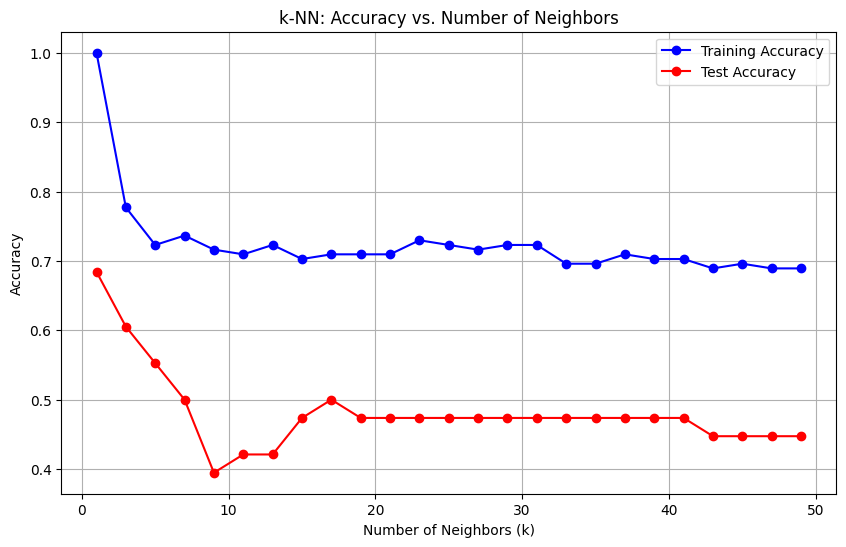

/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None

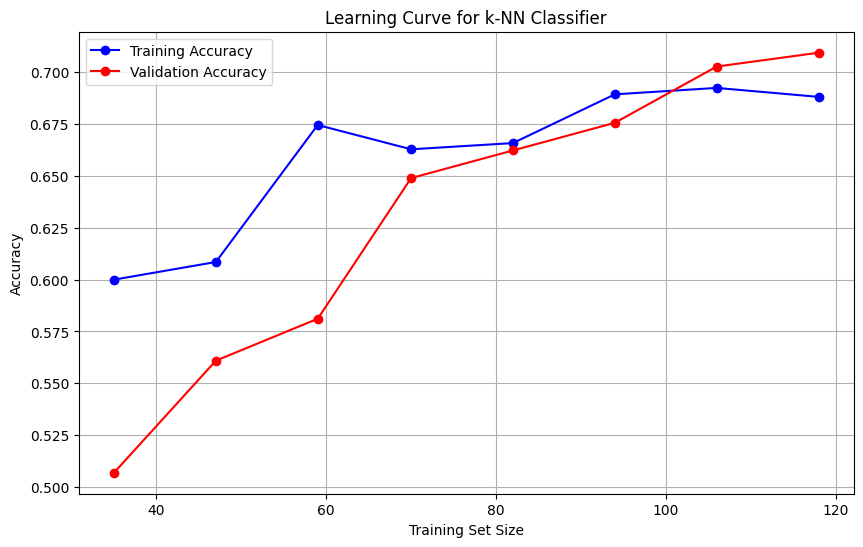

In [39]:
# Defining the pipeline: Scaling, PCA, k-NN
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# Hyperparameter Grid Search
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25],
    'knn__n_neighbors': list(range(1, 51, 2)),
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy')
grid_search.fit(x_train, y_train)

# Evaluating the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {accuracy:.4f}")

# Testing different values of k to see its effect on accuracy
k_values = list(range(1, 51, 2))  # Try k values from 1 to 50 (odd numbers)
train_accuracies = []
test_accuracies = []

for k in k_values:
    # Defining a pipeline with the best PCA components
    pipeline = Pipeline([
        ('scaler', RobustScaler()),  
        ('pca', PCA(n_components=grid_search.best_params_['pca__n_components'])),  
        ('knn', KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform'))
    ])
    
    # Fitting the model on the training data
    pipeline.fit(x_train, y_train)
    
    # Training accuracy
    y_train_pred = pipeline.predict(x_train)
    train_accuracies.append(accuracy_score(y_train, y_train_pred))
    
    # Test accuracy
    y_test_pred = pipeline.predict(x_test)
    test_accuracies.append(accuracy_score(y_test, y_test_pred))

# Plot accuracy vs. k
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', linestyle='-', color='blue', label='Training Accuracy')
plt.plot(k_values, test_accuracies, marker='o', linestyle='-', color='red', label='Test Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.title('k-NN: Accuracy vs. Number of Neighbors')
plt.legend()
plt.grid(True)
plt.show()


# Learning Curve
train_sizes, train_scores, test_scores = learning_curve(best_model, x_train, y_train, cv=5, scoring='accuracy', train_sizes=np.linspace(0.1, 1.0, 10))

train_mean = np.mean(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)

plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_mean, 'o-', color='blue', label='Training Accuracy')
plt.plot(train_sizes, test_mean, 'o-', color='red', label='Validation Accuracy')
plt.xlabel('Training Set Size')
plt.ylabel('Accuracy')
plt.title('Learning Curve for k-NN Classifier')
plt.legend()
plt.grid()
plt.show()


/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-pac

Best Parameters: {'knn__metric': 'euclidean', 'knn__n_neighbors': 25, 'knn__weights': 'uniform', 'pca__n_components': 5}
Test Accuracy: 0.4737


/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:960: UserWarning: Scoring failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 949, in _score
    scores = scorer(estimator, X_test, y_test, **score_params)
  File "/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/metrics/_scorer.py", line 288, in __call__
    return self._score(partial(_cached_call, None

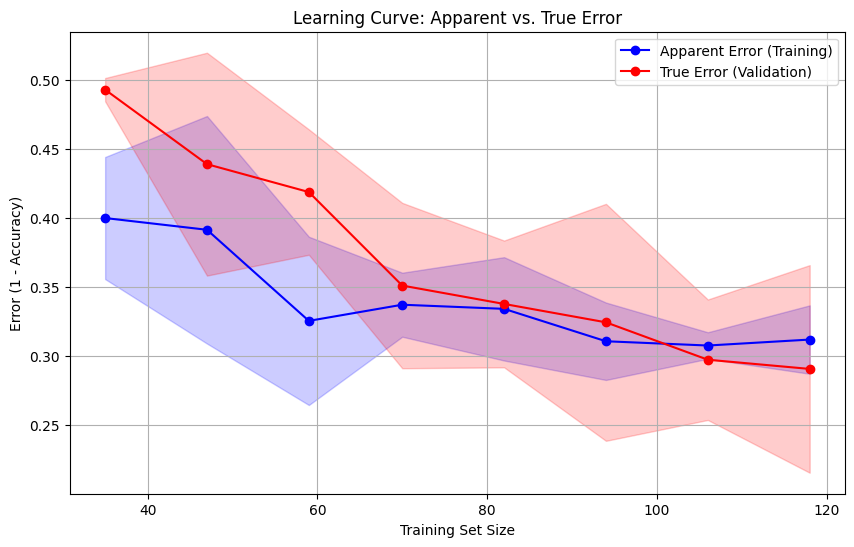

/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-packages/sklearn/neighbors/_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/Caskroom/miniconda/base/envs/machinelearning/lib/python3.10/site-pac

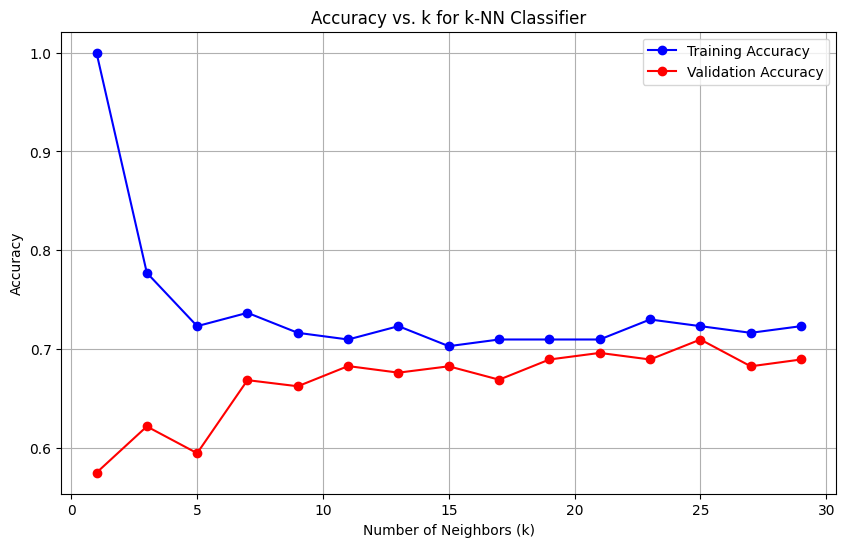

In [6]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, learning_curve, cross_val_score
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import RobustScaler
from sklearn.metrics import accuracy_score


# Define the pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('pca', PCA()),
    ('knn', KNeighborsClassifier())
])

# Define hyperparameter grid
param_grid = {
    'pca__n_components': [5, 10, 15, 20, 25],
    'knn__n_neighbors': list(range(1, 31, 2)),  # Odd k values from 1 to 29
    'knn__weights': ['uniform', 'distance'],
    'knn__metric': ['euclidean', 'manhattan', 'minkowski']
}

# Perform hyperparameter optimization
grid_search = GridSearchCV(pipeline, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(x_train, y_train)

# Best model evaluation
best_model = grid_search.best_estimator_
y_pred = best_model.predict(x_test)
test_accuracy = accuracy_score(y_test, y_pred)

# Print best parameters and test accuracy
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Test Accuracy: {test_accuracy:.4f}")

### PLOT 1: Learning Curve (Apparent vs. True Error)
best_k = grid_search.best_params_['knn__n_neighbors']
best_pca = grid_search.best_params_['pca__n_components']

# Define the final best pipeline
pipeline = Pipeline([
    ('scaler', RobustScaler()),  
    ('pca', PCA(n_components=best_pca)),  
    ('knn', KNeighborsClassifier(n_neighbors=best_k, metric='euclidean', weights='uniform'))
])

# Generate learning curve data
train_sizes, train_scores, val_scores = learning_curve(
    pipeline, x_train, y_train, cv=5, scoring='accuracy',
    train_sizes=np.linspace(0.1, 1.0, 10)
)

# Compute mean and standard deviation
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
val_mean = np.mean(val_scores, axis=1)
val_std = np.std(val_scores, axis=1)

# Convert accuracy to error (1 - accuracy)
train_error = 1 - train_mean
val_error = 1 - val_mean

# Plot Apparent Error (Training) vs True Error (Validation)
plt.figure(figsize=(10, 6))
plt.plot(train_sizes, train_error, marker='o', color='blue', label='Apparent Error (Training)')
plt.plot(train_sizes, val_error, marker='o', color='red', label='True Error (Validation)')
plt.fill_between(train_sizes, train_error - train_std, train_error + train_std, color='blue', alpha=0.2)
plt.fill_between(train_sizes, val_error - val_std, val_error + val_std, color='red', alpha=0.2)

# Labels and Title
plt.xlabel('Training Set Size')
plt.ylabel('Error (1 - Accuracy)')
plt.title('Learning Curve: Apparent vs. True Error')
plt.legend()
plt.grid(True)
plt.show()

### PLOT 2: Accuracy vs. k
k_values = list(range(1, 31, 2))  # Odd k values from 1 to 29
train_accuracies = []
val_accuracies = []

# Loop through different k values
for k in k_values:
    # Define the pipeline with current k
    pipeline = Pipeline([
        ('scaler', RobustScaler()),  
        ('pca', PCA(n_components=best_pca)),  
        ('knn', KNeighborsClassifier(n_neighbors=k, metric='euclidean', weights='uniform'))
    ])
    
    # Perform cross-validation
    scores = cross_val_score(pipeline, x_train, y_train, cv=5, scoring='accuracy')
    
    # Fit on training data to get training accuracy
    pipeline.fit(x_train, y_train)
    train_accuracy = accuracy_score(y_train, pipeline.predict(x_train))

    # Store accuracies
    train_accuracies.append(train_accuracy)
    val_accuracies.append(scores.mean())

# Plot training vs validation accuracy
plt.figure(figsize=(10, 6))
plt.plot(k_values, train_accuracies, marker='o', linestyle='-', label='Training Accuracy', color='blue')
plt.plot(k_values, val_accuracies, marker='o', linestyle='-', label='Validation Accuracy', color='red')

# Labels and Title
plt.xlabel("Number of Neighbors (k)")
plt.ylabel("Accuracy")
plt.title("Accuracy vs. k for k-NN Classifier")
plt.legend()
plt.grid(True)
plt.show()
